## Health Care Analysis - Preprocessing Pair-points

### 1) Data load

In [ ]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# read dataset
dataset = pd.read_excel("../dataset/original_health_data.xlsx")
dataset.head()

,Unnamed: 0,point28,point29,point30,point31,point32,point33,point34,point35,point36,...,point113,point114,point115,point116,point117,point118,point119,Kerdo,Starr,Robinson
0,patient 1,1.10,74,1.26,80,0.68,80,0.70,87,0.60,...,78,0.90,82,0.60,80,0.96,78,18.9,75.04,74.0
1,patient 2,1.10,76,1.30,76,1.00,78,1.30,82,1.20,...,70,0.90,70,0.66,80,0.80,80,-2.9,58.20,78.2
2,patient 3,0.48,78,0.38,80,0.60,82,0.16,28,0.49,...,80,0.90,60,0.95,80,0.85,76,-6.1,67.91,79.2
3,patient 4,1.40,70,1.23,70,0.84,80,1.50,74,1.30,...,60,0.96,68,1.00,88,0.85,70,3.2,57.52,68.2
4,patient 5,1.10,74,0.54,80,2.10,76,0.70,84,1.30,...,80,0.66,74,0.80,80,0.80,80,-20.7,58.36,63.8


### 2) Estatistical Data Analysis (EDA)

In [ ]:
# visualize data of pair variables
def plot_pair_points(ax, x, y):
    """Helper function to plot a single pair on a given axes."""
    sns.scatterplot(x=x, y=y, alpha=0.6, ax=ax)
    
    # Add labels and grid
    ax.set_title(f"{x.name} vs {y.name}", fontsize=10)
    ax.set_xlabel(x.name, fontsize=8)
    ax.set_ylabel(y.name, fontsize=8)
    ax.grid(True, linestyle='--', alpha=0.5)
    
    # Add mean lines
    ax.axvline(x=np.mean(x), color='r', linestyle='--', label=f'Mean X = {np.mean(x):.2f}')
    ax.axhline(y=np.mean(y), color='g', linestyle='--', label=f'Mean Y = {np.mean(y):.2f}')
    ax.legend(fontsize=6)
    

In [27]:
# plot the entire dataset
def plot_all_data(dataset):
    columns = dataset.columns
    num_pairs = len(columns) // 2
    rows = (num_pairs + 3) // 4
    
    fig, axes = plt.subplots(rows, 4, figsize=(20, 5 * rows))
    axes = axes.flatten()
    
    for i in range(num_pairs):
        if 2*i + 1 < len(columns):
            plot_pair_points(axes[i], dataset[columns[2*i]], dataset[columns[2*i+1]])
        else:
            axes[i].axis('off')
    
    # Hide remaining empty subplots
    for j in range(num_pairs, len(axes)):
        axes[j].axis('off')
    
    plt.tight_layout()
    plt.show()

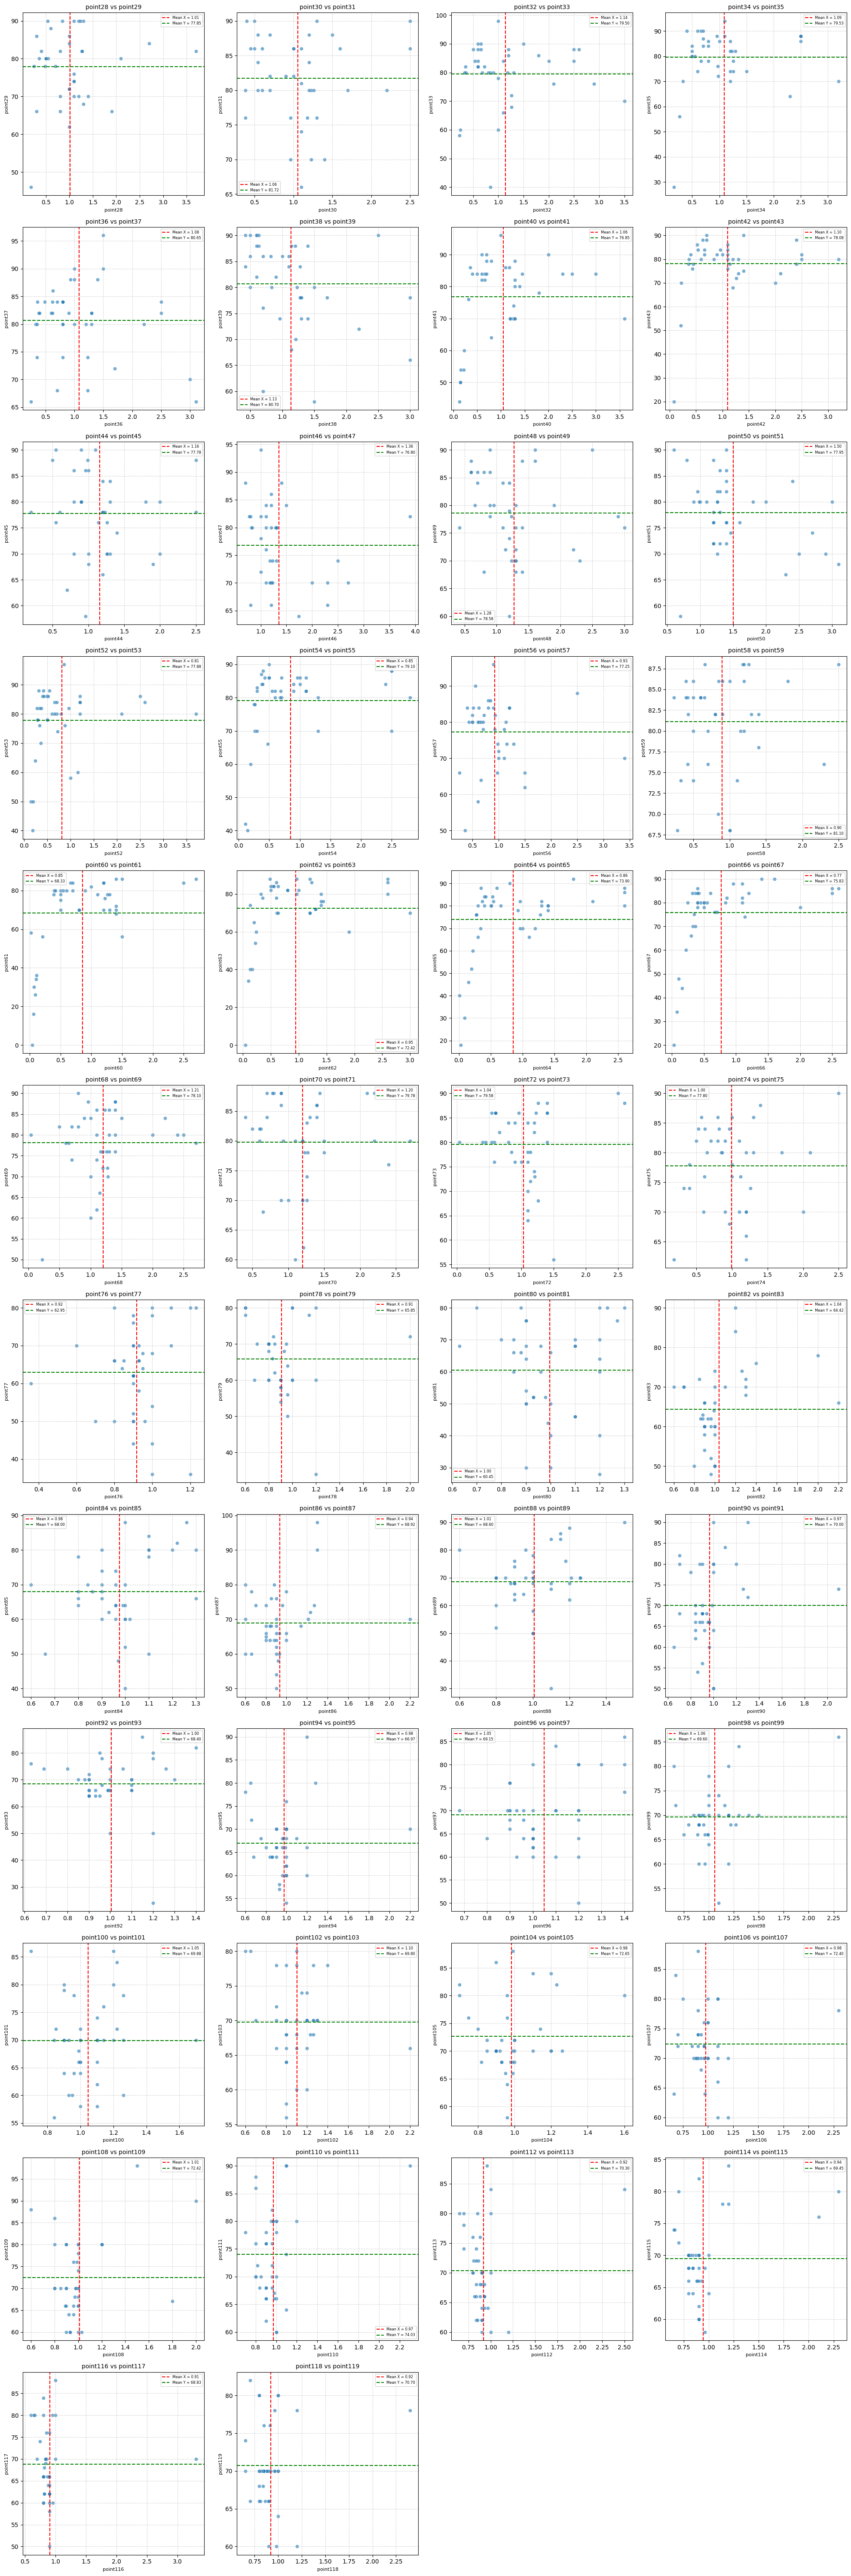

In [30]:
plot_all_data(dataset.iloc[:, 1:-3])

### 3) Pair-variable dimensionality Reduction with Kernel PCA

In [23]:
from sklearn.decomposition import KernelPCA

def pair_dim_reduction(data):
    kpca = KernelPCA(n_components=1, kernel='rbf', gamma=0.1)
    data_1d = kpca.fit_transform(data)
    
    print("Original shape:", data.shape)  # (40, 2)
    print("Reduced shape:", data_1d.shape)  # (40, 1)
    return data_1d.flatten()

In [24]:
def pair_compression(data):
    data_compressed = np.empty((data.shape[0], 0))
    columns = data.columns[1:-3]
    new_col_definition = []

    for i in range(0, len(columns), 2):
        data_1d = []
        data_1d = pair_dim_reduction(data[[columns[i], columns[i+1]]])
        data_compressed = np.column_stack([data_compressed, data_1d])
        new_col_definition.append(f"x{int(i/2)+1}")
        print(f"The points {i+28} and {i+29} are compressed ....")
        #print(f"x{i/2}: {data_1d}")

    df_compressed = pd.DataFrame(data_compressed, columns=new_col_definition)

    return df_compressed


In [25]:
data_46d = pair_compression(dataset)

Original shape: (40, 2)
Reduced shape: (40, 1)
The points 28 and 29 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 30 and 31 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 32 and 33 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 34 and 35 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 36 and 37 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 38 and 39 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 40 and 41 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 42 and 43 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 44 and 45 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 46 and 47 are compressed ....
Original shape: (40, 2)
Reduced shape: (40, 1)
The points 48 and 49 are compressed ....
Original shape: (40, 2)
Reduced 

In [26]:
data_46d.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46
0,-0.204495,0.706923,-0.670797,0.627508,-0.511963,0.101840,-0.635477,0.022242,-0.331430,0.123567,...,-0.494278,0.792750,0.744401,0.342039,0.297775,0.652350,-0.150965,0.421695,-0.109940,0.721649
1,0.063239,0.187908,-0.387678,-0.352767,-0.434383,-0.637019,0.693801,0.238969,0.578612,-0.638544,...,-0.311816,0.793611,0.748710,0.313666,0.759477,0.405378,0.680289,-0.610442,-0.110089,0.720513
2,0.443743,0.680222,-0.502748,-0.084745,-0.154669,0.328483,0.277291,0.232948,-0.367870,-0.636853,...,-0.018246,-0.553286,0.708282,-0.285098,-0.585789,0.658857,-0.190356,0.574346,-0.109960,0.552427
3,-0.432062,-0.012342,-0.670705,-0.400712,-0.507101,0.316319,-0.031358,-0.458494,-0.587550,0.709924,...,-0.494482,0.374265,0.582586,-0.572834,0.762800,-0.645115,-0.538970,-0.338480,-0.031505,-0.564490
4,-0.204495,0.692697,-0.035888,0.041904,-0.507101,0.313794,-0.630210,0.616945,0.570170,-0.299147,...,-0.424001,0.723464,0.472905,0.681048,0.761816,0.434044,-0.190173,0.173512,-0.110202,0.720513


In [32]:
data_46d.to_excel("../dataset/reddim_health_data_46d_v2.xlsx", index = False)